In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import colorsys
import seaborn as sns
from scipy import stats
from sklearn import metrics
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error,roc_auc_score, roc_curve, classification_report,\
                            accuracy_score, confusion_matrix, auc


In [2]:
plt.style.use('seaborn-talk')

In [3]:
df = pd.read_excel('DADOS_DESAFIO.xlsx', sheet_name='DADOS')
df.drop(['ID'], axis=1, inplace=True)

In [4]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,2,0,1,1,1,8.5,3.9,2.5,5.9,4.8,...,4.7,4.3,5.0,5.1,3.7,8.2,8.0,8.4,65.1,1
1,3,1,0,0,0,8.2,2.7,5.1,7.2,3.4,...,5.5,4.0,3.9,4.3,4.9,5.7,6.5,7.5,67.1,0
2,3,0,1,1,1,9.2,3.4,5.6,5.6,5.4,...,6.2,4.6,5.4,4.0,4.5,8.9,8.4,9.0,72.1,1
3,1,1,1,1,0,6.4,3.3,7.0,3.7,4.7,...,7.0,3.6,4.3,4.1,3.0,4.8,6.0,7.2,40.1,0
4,2,0,1,0,1,9.0,3.4,5.2,4.6,2.2,...,6.1,4.5,4.5,3.5,3.5,7.1,6.6,9.0,57.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,3,1,1,0,0,7.6,3.6,2.1,5.2,4.8,...,4.3,6.8,4.4,3.9,4.0,8.2,6.9,8.4,58.1,1
196,2,1,1,1,0,5.9,4.0,3.3,7.8,3.3,...,5.2,6.6,6.0,7.5,5.4,7.9,7.8,8.6,62.1,1
197,3,1,1,1,1,9.7,5.0,7.9,6.3,5.3,...,6.6,5.2,4.4,3.5,4.2,8.6,8.8,7.9,66.1,1
198,2,1,1,1,1,5.5,5.5,6.9,6.6,6.5,...,7.0,5.3,5.9,6.7,4.9,8.2,7.1,7.6,59.1,1


In [5]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
count,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,2.00000,0.500000,0.510000,0.595000,0.460000,7.894000,3.765000,5.243000,5.367500,4.06150,...,6.048500,5.210500,4.242000,4.464000,3.816000,6.952000,6.952500,7.665000,58.200000,0.430000
std,0.82669,0.501255,0.501154,0.492124,0.499648,1.383014,0.768916,1.655189,1.209964,1.14706,...,0.875345,1.496005,0.911918,1.192651,0.749368,1.241128,1.082893,0.893233,8.966156,0.496318
min,1.00000,0.000000,0.000000,0.000000,0.000000,5.000000,2.200000,0.400000,1.500000,1.50000,...,3.700000,1.200000,1.200000,2.300000,1.600000,4.700000,4.000000,4.300000,37.100000,0.000000
25%,1.00000,0.000000,0.000000,0.000000,0.000000,6.700000,3.300000,4.100000,4.500000,3.20000,...,5.400000,4.200000,3.700000,3.575000,3.300000,6.000000,6.100000,7.100000,51.100000,0.000000
50%,2.00000,0.500000,1.000000,1.000000,0.000000,8.050000,3.700000,5.300000,5.400000,4.00000,...,6.100000,5.200000,4.300000,4.250000,3.900000,7.050000,7.000000,7.600000,58.600000,0.000000
75%,3.00000,1.000000,1.000000,1.000000,1.000000,9.100000,4.100000,6.425000,6.200000,4.92500,...,6.600000,6.225000,4.700000,5.325000,4.325000,7.900000,7.650000,8.200000,65.350000,1.000000
max,3.00000,1.000000,1.000000,1.000000,1.000000,10.000000,5.700000,8.900000,8.700000,6.90000,...,8.400000,9.500000,6.700000,7.500000,5.500000,9.900000,9.900000,9.900000,77.100000,1.000000


array([[<AxesSubplot:title={'center':'X1'}>,
        <AxesSubplot:title={'center':'X2'}>,
        <AxesSubplot:title={'center':'X3'}>,
        <AxesSubplot:title={'center':'X4'}>,
        <AxesSubplot:title={'center':'X5'}>],
       [<AxesSubplot:title={'center':'X6'}>,
        <AxesSubplot:title={'center':'X7'}>,
        <AxesSubplot:title={'center':'X8'}>,
        <AxesSubplot:title={'center':'X9'}>,
        <AxesSubplot:title={'center':'X10'}>],
       [<AxesSubplot:title={'center':'X11'}>,
        <AxesSubplot:title={'center':'X12'}>,
        <AxesSubplot:title={'center':'X13'}>,
        <AxesSubplot:title={'center':'X14'}>,
        <AxesSubplot:title={'center':'X15'}>],
       [<AxesSubplot:title={'center':'X16'}>,
        <AxesSubplot:title={'center':'X17'}>,
        <AxesSubplot:title={'center':'X18'}>,
        <AxesSubplot:title={'center':'X19'}>,
        <AxesSubplot:title={'center':'X20'}>],
       [<AxesSubplot:title={'center':'X21'}>,
        <AxesSubplot:title={'center':'X

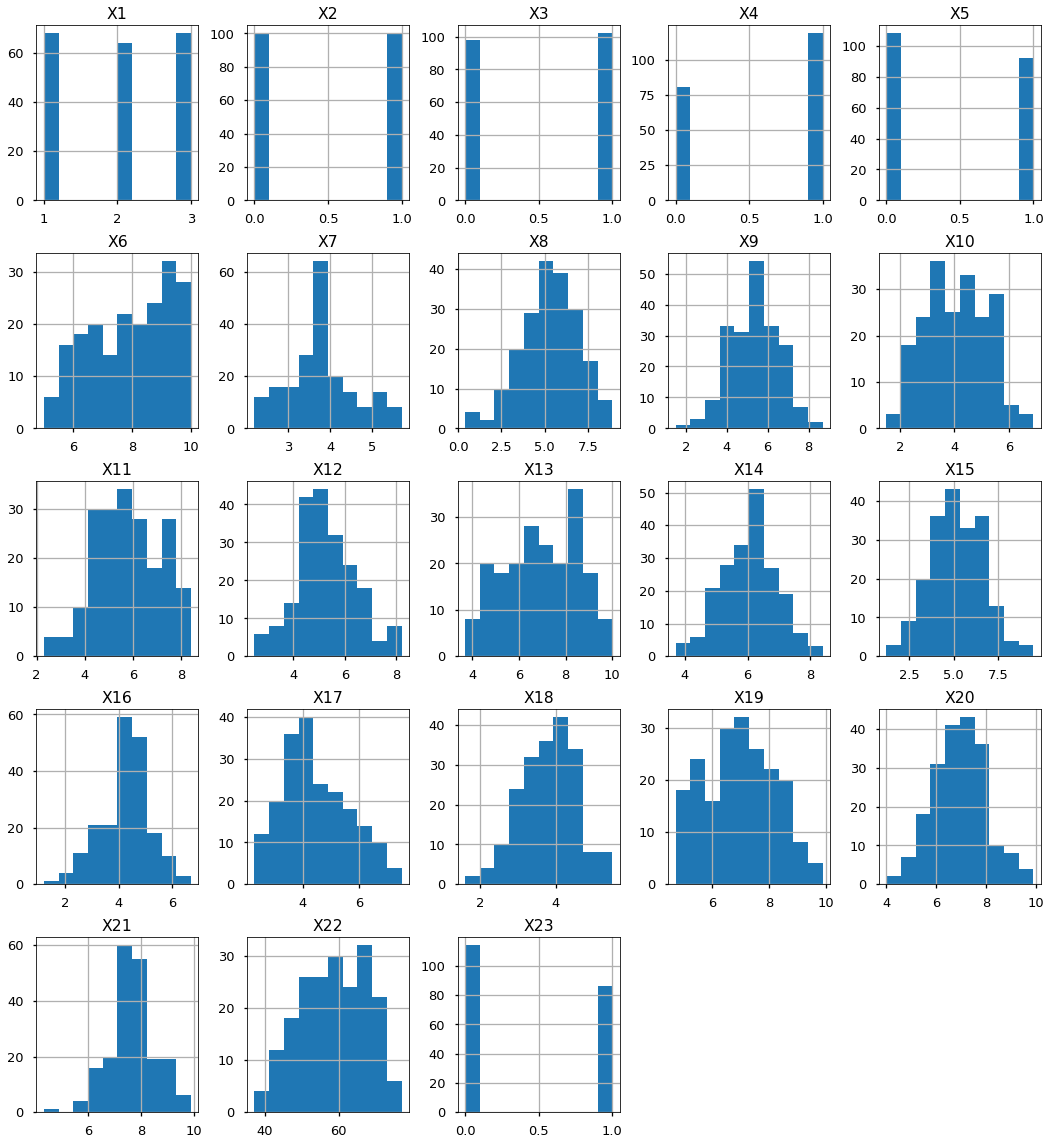

In [6]:
df.hist(figsize=(18, 20))

<AxesSubplot:>

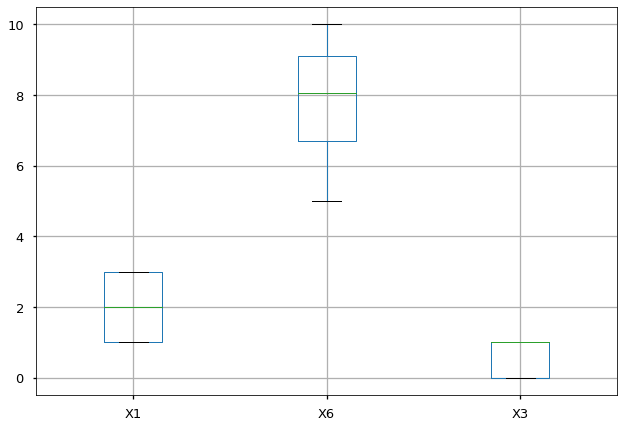

In [7]:
df.boxplot(column=['X1', 'X6', 'X3'])

<AxesSubplot:>

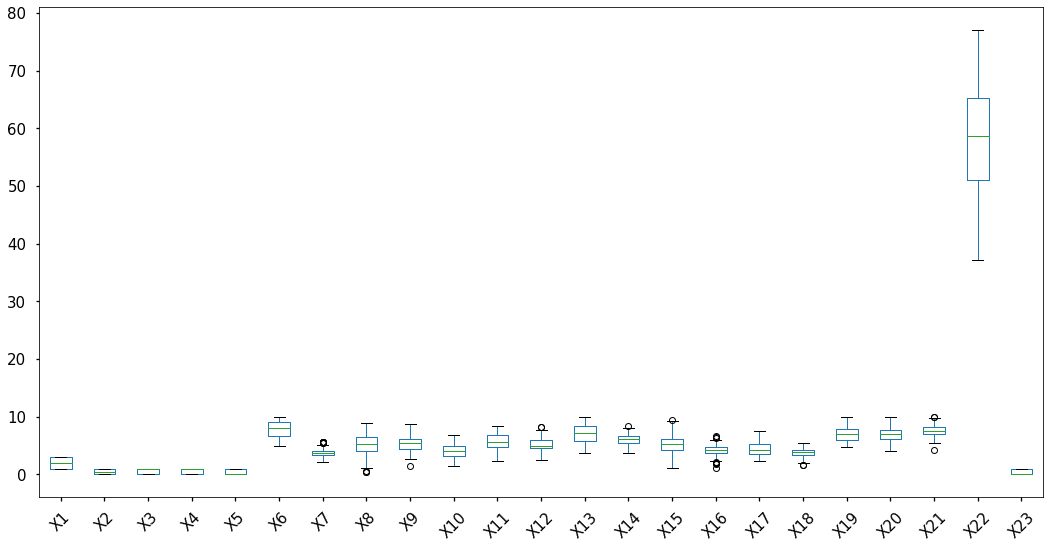

In [8]:
df.boxplot(figsize=(18, 9), grid=False, rot=45, fontsize=15)

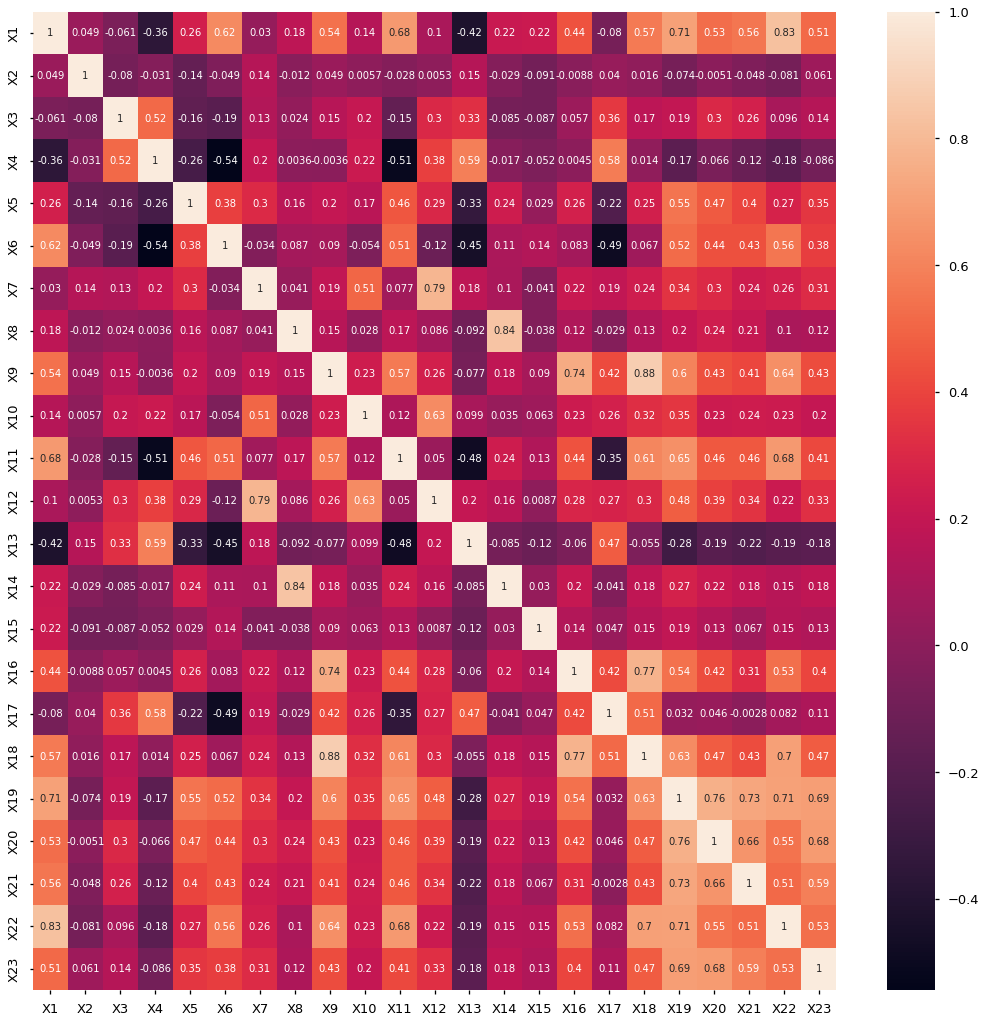

In [16]:
data = pd.read_excel('DADOS_DESAFIO.xlsx', sheet_name='DADOS')
data = data.drop(['ID'], axis=1)
corr_df = data.corr(method='pearson')
plt.figure(figsize=(18, 18))
sns.heatmap(corr_df, annot=True)
plt.show()

In [10]:
df2 = df[np.abs(df-df.mean()) <= (3*df.std())]

In [11]:
df2.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
count,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,199.000000,200.00000,...,200.000000,200.000000,199.000000,200.000000,200.000000,200.000000,200.000000,199.000000,200.000000,200.000000
mean,2.00000,0.500000,0.510000,0.595000,0.460000,7.894000,3.765000,5.243000,5.386935,4.06150,...,6.048500,5.210500,4.257286,4.464000,3.816000,6.952000,6.952500,7.681910,58.200000,0.430000
std,0.82669,0.501255,0.501154,0.492124,0.499648,1.383014,0.768916,1.655189,1.181306,1.14706,...,0.875345,1.496005,0.888157,1.192651,0.749368,1.241128,1.082893,0.862797,8.966156,0.496318
min,1.00000,0.000000,0.000000,0.000000,0.000000,5.000000,2.200000,0.400000,2.600000,1.50000,...,3.700000,1.200000,1.800000,2.300000,1.600000,4.700000,4.000000,5.500000,37.100000,0.000000
25%,1.00000,0.000000,0.000000,0.000000,0.000000,6.700000,3.300000,4.100000,4.500000,3.20000,...,5.400000,4.200000,3.750000,3.575000,3.300000,6.000000,6.100000,7.100000,51.100000,0.000000
50%,2.00000,0.500000,1.000000,1.000000,0.000000,8.050000,3.700000,5.300000,5.400000,4.00000,...,6.100000,5.200000,4.300000,4.250000,3.900000,7.050000,7.000000,7.600000,58.600000,0.000000
75%,3.00000,1.000000,1.000000,1.000000,1.000000,9.100000,4.100000,6.425000,6.200000,4.92500,...,6.600000,6.225000,4.700000,5.325000,4.325000,7.900000,7.650000,8.200000,65.350000,1.000000
max,3.00000,1.000000,1.000000,1.000000,1.000000,10.000000,5.700000,8.900000,8.700000,6.90000,...,8.400000,9.500000,6.700000,7.500000,5.500000,9.900000,9.900000,9.900000,77.100000,1.000000


<AxesSubplot:>

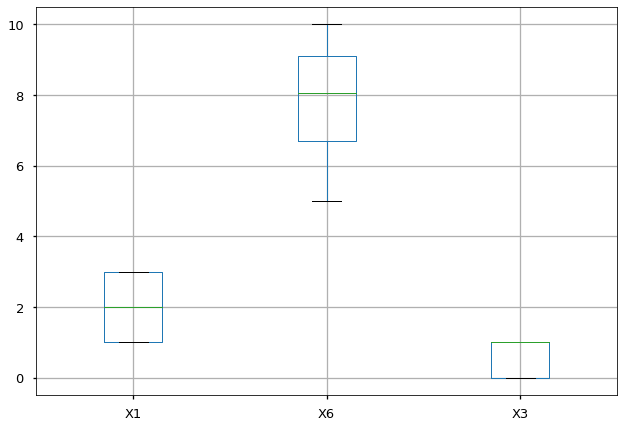

In [12]:
df2.boxplot(column=['X1', 'X6', 'X3'])

<AxesSubplot:>

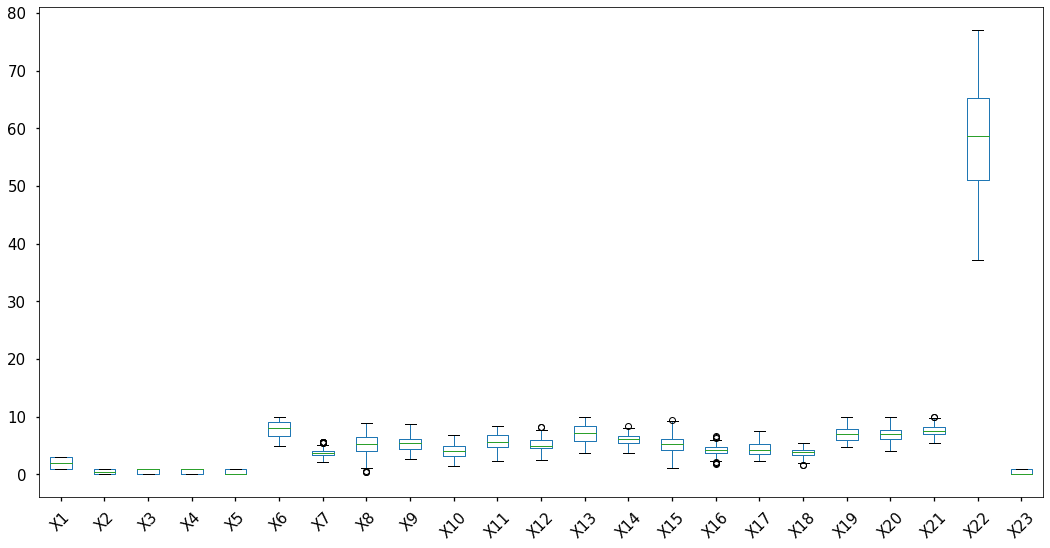

In [13]:
df2.boxplot(figsize=(18, 9), grid=False, rot=45, fontsize=15)

In [14]:
import statsmodels.api as sm

baseline_df = data[['X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']]
modelo = sm.OLS(data['X19'], baseline_df, axis=1)
res = modelo.fit()
res.summary()

C:\Users\lucas\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['axis']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    X19   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              2275.
Date:                Fri, 22 Oct 2021   Prob (F-statistic):                   3.80e-198
Time:                        08:32:42   Log-Likelihood:                         -167.74
No. Observations:                 200   AIC:                                      361.5
Df Residuals:                     187   BIC:                                      404.4
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X6             0.3648      0.035     10.500      0.000       0.296       0.433
X7            -0.2697      0.088     -3.054      0.003      -0.444      -0.095
X8             0.0538      0.046      1.169      0.244      -0.037       0.145
X9             0.1028      0.074      1.389      0.167      -0.043       0.249
X10           -0.0252      0.048     -0.523      0.602      -0.120       0.070
X11           -0.0282      0.135     -0.210      0.834      -0.294       0.238
X12            0.6051      0.069      8.744      0.000       0.469       0.742
X13           -0.0875      0.032     -2.725      0.007      -0.151      -0.024
X14           -0.0708      0.087     -0.813      0.417      -0.243       0.101
X15            0.0289      0.029      1.008      0.315      -0.028       0.085
X16            0.0260      0.075      0.349      0.728      -0.121       0.173
X17           -0.1383      0.136     -1.020      0.309      -0.406       0.129
X18            0.7196      0.286      2.516      0.013       0.155       1.284
==============================================================================
Omnibus:                       17.163   Durbin-Watson:                   2.396
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.571
Skew:                          -0.765   Prob(JB):                     5.62e-05
Kurtosis:                       3.072   Cond. No.                         160.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""